# Scattering Techniques for Polymer Conformation

The scattering of electromagnetic or matter waves is a commonly used tool to obtain information about the conformation of polymer chains. Light wave, X-rays (SAXS) but also neutrons (SANS) are used to study polymer solutions. While all waves have their own pecularities, they are all based on the intereference of partial waves scattered at different segments of the polymer.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm
from scipy.constants import c,epsilon_0,e,physical_constants
import json

%config InlineBackend.figure_format = 'retina' 

with open('style.json', 'r') as fp:
    style = json.load(fp)
    
plt.rcParams.update(style) 

A solution of different polymer chains (assume its dilute) has different length scales involved. There is an average distance between the polymer chains which is large as compared to the polymer size. Waves that interfere when being scattered from different polymers reflect the structure of the solution and is commonly addressed in a scattering quantity, which is the **structure factor**. Waves that are scattered by the same chain and interfer are a measure of the polymer conformation and described by the **form factor**. Yet, this scale seperation might not always be possible in dense polymer solutions.

## Form Factor

We would like to consider the form factor only, which gives us information on the polymer conformation. We have an incident plane wave with the wave vector $\vec{q}_i$ which is falling on our polymer chain. The wavevector has a direction and magnitude according to 

$$
\vec{q}_i=\frac{2\pi}{\lambda}\vec{u}_i
$$

where $\lambda$ is the wavelength. Note that you should take care of the corresponding refractive index $n$ in the case of light scattering ($\lambda=\lambda_0/n$). We will neglect the refractive index in the following, as it does not change the qualitative results. 

**image with vectors**

The scattered light is then observed in a different direction, e.g. along the direction $\vec{u}_s$, which results in a scattered wavevector $\vec{q}_s$. Considering now the scattered wave from two segments of the polymer at $\vec{R}_i$ and $\vec{R}_j$ results in a path length difference $\Delta$ between the two waves, that is given by the indcident wave path different and the scattered wave path difference.

$$
\Delta = \vec{u}_i\cdot \vec{R}_j - \vec{u}_s\cdot \vec{R}_j=(\vec{u}_i-\vec{u}_s)\cdot \vec{R}_j
$$

This path difference translates into a phase difference if the waves

$$
\varphi_{j}=\frac{2 \pi}{\lambda}\left(\vec{u}_{\mathrm{i}}-\vec{u}_{\mathrm{s}}\right) \cdot \vec{R}_{j}=\left(\vec{q}_{\mathrm{i}}-\vec{q}_{\mathrm{s}}\right) \cdot \vec{R}_{j}=\vec{q} \cdot \vec{R}_{j}
$$

Since the magnitude of the incident and the scattered wavevectors are the same, i.e.

$$
\left|\vec{q}_{i}\right|=\left|\vec{q}_{s}\right|=\frac{2 \pi}{\lambda}
$$

we can express the magnitude of the vector $\vec{q}$ denoting the momentum exchange during scattering, in terms of the scattering angle $\theta$

$$
q \equiv|\vec{q}|=2\left|\vec{q}_{i}\right| \sin \left(\frac{\theta}{2}\right)=\frac{4 \pi}{\lambda} \sin \left(\frac{\theta}{2}\right)
$$

With the help of the phase angle, we can now find the electric field amplitude of the scattered waves of all segments $j$ with

$$
E_{\mathrm{s}}=E_{\mathrm{i}} \sum_{j=1}^{N} A \cos \left(2 \pi \nu t-\varphi_{j}\right)
$$


which provides with its magnitude square also the intensity of the scattered wave.


$$
\begin{aligned}
I_{\mathrm{s}} &=2 I_{\mathrm{i}} A^{2} \nu \int_{0}^{1 / \nu}\left[\sum_{j=1}^{N} \cos \left(2 \pi \nu t-\varphi_{j}\right)\right]^{2} \mathrm{~d} t \\
&=2 I_{\mathrm{i}} A^{2} \nu \int_{0}^{1 / \nu}\left[\sum_{j=1}^{N} \sum_{k=1}^{N} \cos \left(2 \pi \nu t-\varphi_{j}\right) \cos \left(2 \pi \nu t-\varphi_{k}\right)\right] \mathrm{d} t \\
&=I_{\mathrm{i}} A^{2} \nu \int_{0}^{1 / \nu}\left[\sum_{j=1}^{N} \sum_{k=1}^{N}\left(\cos \left(4 \pi \nu t-\varphi_{j}-\varphi_{k}\right)+\cos \left(\varphi_{k}-\varphi_{j}\right)\right)\right] \mathrm{d} t
\end{aligned}
$$

The first term in the sum turns out to be zero when integrated over time, such that only the difference of the the two individual phase angles is important.


$$
I_{s}(\vec{q})=\underbrace{I_{i} A^{2} N^{2}}_{I_{s}(0)} \underbrace{\frac{1}{N^{2}} \sum_{k=1}^{N} \sum_{j=1}^{N} \cos \left(\varphi_{k}-\varphi_{j}\right)}_{P(\vec{q})}
$$

The latter double sum inlcuding a prefactor defines the **from factor**


$$
P(\vec{q}) \equiv \frac{I_{\mathrm{s}}(\vec{q})}{I_{\mathrm{s}}(0)}\tag{form factor}
$$

Inserting the expression for the individual phase angles yields

$$
P(\vec{q})=\frac{1}{N^{2}} \sum_{i=1}^{N} \sum_{j=1}^{N} \cos \left[\vec{q} \cdot\left(\vec{R}_{i}-\vec{R}_{j}\right)\right]
$$

We therefore have to calculate the average over the phase angles or exchanged momentum times the position difference between two segments

$$
\left\langle\cos \left[\vec{q} \cdot\left(\vec{R}_{i}-\vec{R}_{j}\right)\right]\right\rangle=\frac{1}{4 \pi} \int_{0}^{2 \pi}\left[\int_{0}^{\pi} \cos \left(q R_{i j} \cos \alpha\right) \sin \alpha \mathrm{d} \alpha\right] \mathrm{d} \beta
$$

Using 


$$
\vec{q} \cdot\left(\vec{R}_{i}-\vec{R}_{j}\right)=q R_{i j} \cos \alpha
$$

directly gives us the idea that the averaged cosine results in a sinus cardinalis

$$
\left\langle\cos \left[\vec{q} \cdot\left(\vec{R}_{i}-\vec{R}_{j}\right)\right]\right\rangle=\frac{1}{2} \int_{-1}^{1} \cos \left(q R_{i j} x\right) \mathrm{d} x=\frac{\sin \left(q R_{i j}\right)}{q R_{i j}}
$$

which is reminiscent of the single slit result or the Fourier transform of the segment distribution in the scattering objects components:

$$
P(q)=\frac{1}{N^{2}} \sum_{i=1}^{N} \sum_{j=1}^{N} \frac{\sin \left(q R_{i j}\right)}{q R_{i j}}
$$


## Radius of Gyration

We can relate the latter result directly with properties of the polymer chain, like the radius of gyration.
If we consider only values of the sinc argument which are $q R_ij<1$, i.e. we consider **small angle scattering**, we can expand the sinc function into

$$
\frac{\sin x}{x}=1-\frac{x^{2}}{3 !}+\frac{x^{4}}{5 !}-\cdots
$$

This yields a form factor 

$$
P(q)=1-\frac{q^{2}}{6 N^{2}} \sum_{i=1}^{N} \sum_{j=1}^{N} R_{i j}^{2}+\cdots \quad \text { for } q R<1
$$

which gives with the definition of the radius of gyration directly

$$
P(q)=1-\frac{1}{3} q^{2}\left\langle R_{\mathrm{g}}^{2}\right\rangle+\cdots \quad \text { for } q R_{\mathrm{g}}<1
$$

or

$$
P(q)=1-\frac{16 \pi^{2} n^{2}}{3 \lambda^{2}}\left\langle R_{\mathrm{g}}^{2}\right\rangle \sin ^{2}\left(\frac{\theta}{2}\right)+\cdots
$$
when inserting $q$. We will see in the derivation of the Debye function, that this inverse parabola can also be approximated with a Gaussian function

$$
P(q) \cong \exp \left(-\frac{q^{2} R_{\mathrm{g}}^{2}}{3}\right) \quad \text { for } q R_{\mathrm{g}}<1
$$

which is termed the **Guinier function**.

## Debye Function

The above consideration is not taking into account that not all distances $R_{ij}$ have the same probability for a polymer chain. This was first taken into account by Pieter Debye in form of the ideal chain. The end-to-end distance distribution we have obtained earlier delivers the probability to find the ending segments of a polymer with $N$ Kuhn segments of length $b$ at a distance $R$. We can use this expression as well to give a probability density to find two segments $i,j$ at a distance $R_{ij}$, which is then given by


$$
p(R_{i j} ; \underbrace{|i-j|}_{N}) d R_{i j}=\left(\frac{3}{2 \pi|i-j| b^{2}}\right)^{\frac{3}{2}} e^{-3 R^{2}\left(2|i-j| b^{2}\right)} 4 \pi R_{i j}^{2} d R_{i j}
$$

Note that the number of segments takes here the value N=|i-j|. Using this density distribution, we have to weight each contribution of the form factor with the corresponding probability density, i.e.

\begin{e}
P(q)=\frac{1}{N^{2}} \sum_{i=1}^{N} \sum_{j=1}^{N} \int_{0}^{\infty} \frac{\sin \left(q R_{i j}\right)}{q R_{i j}} P\left(R_{i j},|i-j|\right) 4 \pi R_{i j}^{2} \mathrm{~d} R_{i j}=\frac{1}{N^{2}} \sum_{i=1}^{N} \sum_{j=1}^{N} \exp \left(-\frac{q^{2} b^{2}|i-j|}{6}\right)
$$

One can transform the double sum above in the case of large segment number into a double integral. The result is the Debye function 

$$
P(q)=\frac{2}{\left(q^{2}\left\langle R_{\mathrm{g}}^{2}\right\rangle\right)^{2}}\left[\exp \left(-q^{2}\left\langle R_{\mathrm{g}}^{2}\right\rangle\right)-1+q^{2}\left\langle R_{\mathrm{g}}^{2}\right\rangle\right]\tag{Debye function}
$$

describing the scattering of an ideal chain, which is displayed in the graph below for two different radii of gyration.

In [4]:
def DebyeFunction(q,R_g):
    return((np.exp(-(q*R_g)**2)-1+(q*R_g)**2)*2/((q*R_g)**2)**2)

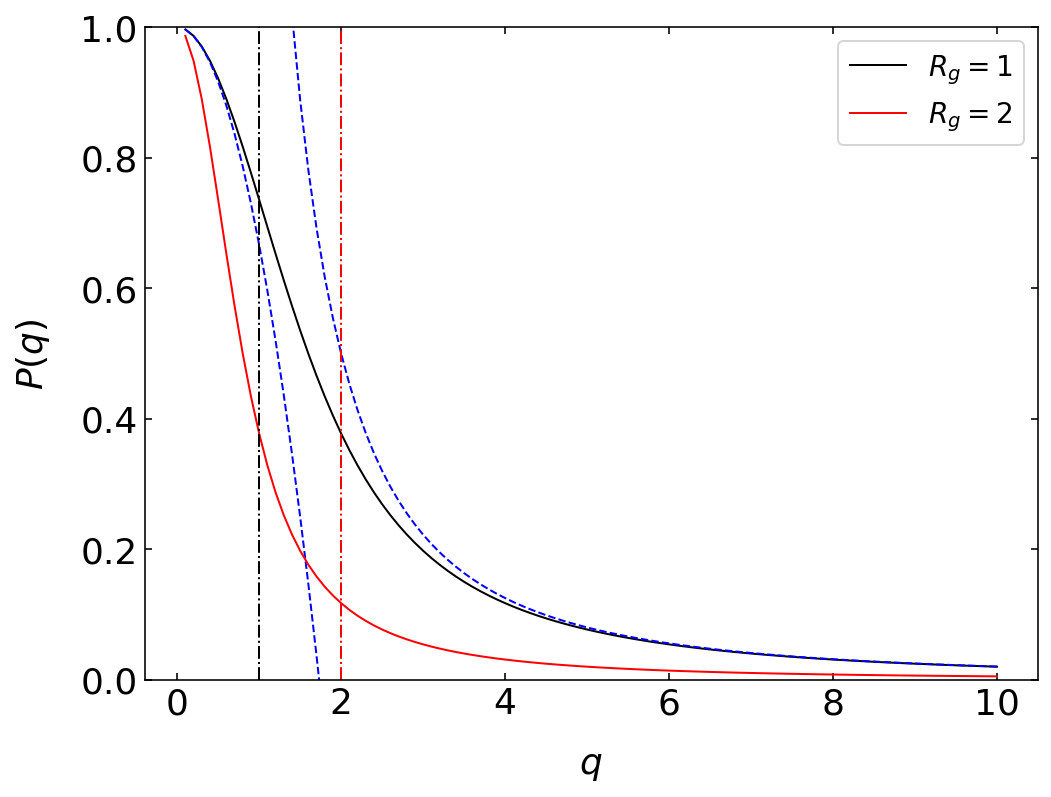

In [28]:
q=np.linspace(0.1,10,100)
R_g=1
plt.figure(figsize=(8,6))
plt.plot(q,DebyeFunction(q,R_g),'k-',label=r"$R_g=1$")
plt.plot(q,1-(q*R_g)**2/3,'b--')
plt.plot(q,2/(q*R_g)**2,'b--')
R_g=2
plt.plot(q,DebyeFunction(q,R_g),'r-',label=r"$R_g=2$")
plt.axvline(x=1,color='k',linestyle='-.')
plt.axvline(x=2,color='r',linestyle='-.')
plt.xlabel(r"$q$")
plt.ylabel(r"$P(q)$")
plt.ylim(0,1)
plt.legend()
plt.show()

We can have a look at different limits again, e.g. the small angle limit for which we find the same result as in the derivation in the previous section

$$
P(q) \cong\left(1-\frac{q^{2}\left\langle R_{\mathrm{g}}^{2}\right\rangle}{3}+\cdots\right) \quad \text { for } q \sqrt{\left\langle R_{\mathrm{g}}^{2}\right\rangle}<1
$$

Similarly, we find 

$$
P(q) \cong \frac{2}{q^{2}\left\langle R_{\mathrm{g}}^{2}\right\rangle} \quad \text { for } q \sqrt{\left\langle R_{\mathrm{g}}^{2}\right\rangle}>1
$$

in the limit of large q, where the form factor decays as $1/q^2$. Both limits are included in the plot above to see their range of validity.